### Importación de Bibliotecas

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Creación de Datos Aleatorios

In [4]:
np.random.seed(42)

# Crear datos aleatorios con correlación
n_samples = 300

# Generar datos con correlación
x=np.random.randn(n_samples)
y=np.random.randn(n_samples)
z=0.6*x + 0.2*y + np.random.randn(n_samples)

### Creación de Matriz de Covarianza

In [5]:
Matriz=np.column_stack((x,y,z))
print(Matriz.shape)

(300, 3)


### Escalamiento de Datos y Aplicación de PCA

In [21]:
pca = PCA(n_components=2)
Matriz_std = StandardScaler().fit_transform(Matriz)
Matriz_pca = pca.fit_transform(Matriz_std)
print(f'Matriz_std.shape: {Matriz_std.shape}')
print(f'Matriz_pca.shape: {Matriz_pca.shape}')



Matriz_std.shape: (300, 3)
Matriz_pca.shape: (300, 2)


### Cálculo de la Varianza Explicada por Cada Componente Principal

In [22]:
varianza_explicada=pca.explained_variance_ratio_
varianza_total=np.sum(varianza_explicada)
var_total = varianza_explicada.sum()
print(f"Varianza explicada por cada componente: {varianza_explicada}")
print(f"Varianza total explicada por los componentes: {varianza_total}")

Varianza explicada por cada componente: [0.49409359 0.33969217]
Varianza total explicada por los componentes: 0.8337857612041142


### Cálculo de Eigenvalores y Eigenvectores

In [23]:
autovalores=pca.explained_variance_
autovectores=pca.components_
print(f"Autovalores: {autovalores}")
print(f"Autovectores: {autovectores}")

Autovalores: [1.48723823 1.0224848 ]
Autovectores: [[ 0.69212449  0.11861242  0.71196544]
 [-0.24072727  0.96786066  0.07277452]]


/tmp/ipykernel_353358/838243017.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(Matriz[:, 0], Matriz[:, 1], Matriz[:, 2], cmap='viridis', alpha=0.7)
/tmp/ipykernel_353358/838243017.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter(Matriz_pca[:, 0], Matriz_pca[:, 1], cmap='viridis', alpha=0.7)


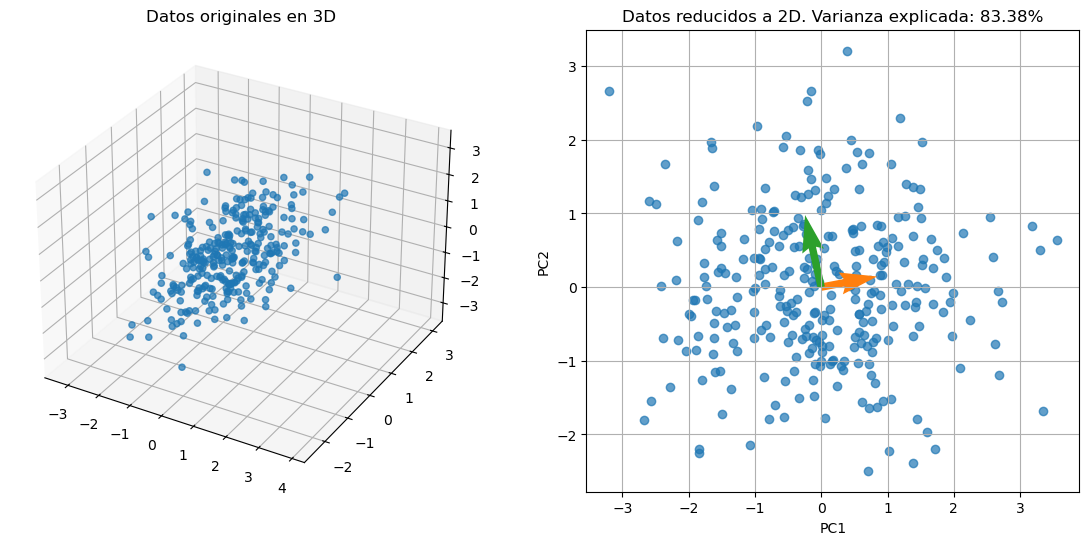

In [24]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection="3d")
ax1.scatter(Matriz[:, 0], Matriz[:, 1], Matriz[:, 2], cmap='viridis', alpha=0.7)
ax1.set_title("Datos originales en 3D")

longitud1 = np.sqrt(autovalores[0])
longitud2 = np.sqrt(autovalores[1])

ax2 = fig.add_subplot(122)
ax2.scatter(Matriz_pca[:, 0], Matriz_pca[:, 1], cmap='viridis', alpha=0.7)
ax2.quiver(0,0, autovectores[0][0] * longitud1, autovectores[0][1] * longitud1, angles='xy', scale_units='xy', scale=1, color=f'C1',width=0.015)
ax2.quiver(0,0, autovectores[1][0] * longitud2, autovectores[1][1] * longitud2, angles='xy', scale_units='xy', scale=1, color=f'C2',width=0.015)
ax2.set_title(f"Datos reducidos a 2D. Varianza explicada: {varianza_total:.2%}")
ax2.set_xlabel('PC1'); ax2.set_ylabel('PC2'); ax2.grid(True)
plt.show()